# Getting Started with Qiskit

In this tutorial you will go through an overview of working with Qiskit. The fundamental package of Qiskit is Terra that provides the basic building blocks necessary to program quantum computers. The fundamental unit of Qiskit is the [quantum circuit](https://en.wikipedia.org/wiki/Quantum_circuit). A basic workflow using Qiskit consists of the following stages: 

* **Build**: Create different quantum circuits that represent the problem you are solving.
* **Compile**: Adapt the circuit to the specifications of the backend you want to use.
* **Run**: Run the compiled circuit on different backends. They can be cloud-based or local.
* **Analyze**: Visualize the results of the experiment or check statistics related to them.

## Build the circuit <a name='build'></a>

The basic element needed for your first program is the `QuantumCircuit`.  We begin by creating a `QuantumCircuit` comprised of three qubits and three classical bits.

In [1]:
from qiskit import QuantumCircuit

# Create a Quantum Circuit acting on a quantum register of three qubits and three classical bits
qc = QuantumCircuit(3, 3)

After you create the circuit with its registers, you can add gates ("operations") to manipulate the registers. As you proceed through the tutorials you will find more gates and circuits; below is an example of a quantum circuit that makes a three-qubit [Greenberger-Horne-Zeilinger](https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state) (GHZ) state

$$|\psi\rangle = \left(|000\rangle+|111\rangle\right)/\sqrt{2}.$$

To create such a state, we start with a three-qubit quantum register. By default, each qubit in the register is initialized to $|0\rangle$. To make the GHZ state, we apply the following gates:
- A Hadamard gate $H$ on qubit 0, which puts it into the superposition state $\left(|0\rangle+|1\rangle\right)/\sqrt{2}$.
- A controlled-Not operation ($C_{X}$) between qubit 0 and qubit 1.
- A controlled-Not operation between qubit 0 and qubit 2.

On an ideal quantum computer, the state produced by running this circuit would be the GHZ state above.

In Qiskit, operations can be added to the circuit one by one, as shown below.

In [2]:
# Add a H gate on qubit 0, putting this qubit in superposition.
qc.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
qc.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
qc.cx(0, 2)

For more information about the quantum gates available in Qiskit, check the [Circuit Library](https://qiskit.org/documentation/apidoc/circuit_library.html).

A real experiment terminates by _measuring_ each qubit (usually in the computational $|0\rangle, |1\rangle$ basis). Without measurement, we cannot gain information about the state. Measurements cause the quantum system to collapse into classical bits. 

For example, suppose we make independent measurements on each qubit of the three-qubit GHZ state

$$|\psi\rangle = (|000\rangle +|111\rangle)/\sqrt{2},$$

and let $xyz$ denote the bitstring that results. Under the qubit labeling used by Qiskit, $x$ would correspond to the outcome on qubit 2, $y$ to the outcome on qubit 1, and $z$ to the outcome on qubit 0. 

<div class="alert alert-info">
Note

This representation of the bitstring puts the most significant bit (MSB) on the left, and the least significant bit (LSB) on the right. This is the standard ordering of binary bitstrings. We order the qubits in the same way (qubit representing the MSB has index 0), which is why Qiskit uses a non-standard tensor product order. 
</div>

Recall the probability of obtaining outcome $xyz$ is given by

$$\mathrm{Pr}(xyz) = |\langle xyz | \psi \rangle |^{2}$$

and as such for the GHZ state probability of obtaining 000 or 111 are both 1/2.

In order to measure the qubits on our circuit, you can use the `circuit.measure(qubits, clbits)` method to map the result of the qubits into the classical bits.


In [3]:
# map the quantum measurement to the classical bits
qc.measure(range(3), range(3))

## Visualize the circuit <a name='visualize'></a>

You can visualize your circuit using Qiskit `QuantumCircuit.draw()`, which plots the circuit in the form found in many textbooks.

In [4]:
qc.draw()

┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

If you want the plot given by `QuantumCircuit.draw()` to look better, you can use Matplotlib by setting the optional argument `output` to `mpl`. Given that the first argument of this method is precisely `output`, you can write `QuantumCircuit.draw('mpl')` instead of `QuantumCircuit.draw(output = 'mpl')`.

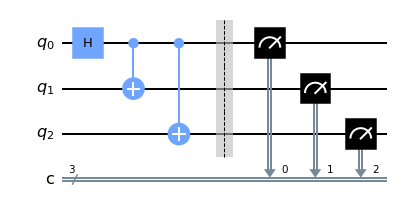

In [5]:
qc.draw('mpl')

In this circuit, the qubits are put in order, with qubit zero (least significant) at the top and qubit two (most significant) at the bottom. The circuit is read left to right (meaning that gates that are applied earlier in the circuit show up further to the left).

If you prefer to have the most significant qubits represented at the top, like in most physics textbooks, instead of at the bottom, you can set the `reverse_bits` argument of `QuantumCircuit.draw()` to `True`.

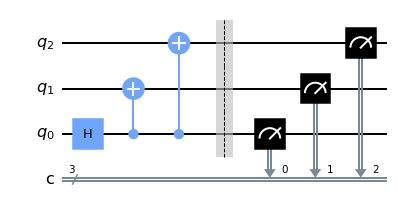

In [6]:
qc.draw("mpl", reverse_bits = True)

## Simulate the circuit using Qiskit Aer <a name='simulation'></a>

In this example, you will run the circuit on a simulator. In order to do this, you will use our simulation package, Qiskit Aer. It provides many different backends for different simulation goals. If you have any issues installing `Aer`, there is also a basic, Python only, implementation called `BasicAer` in Terra.

You can view the available backends using `Aer.backends()`

In [7]:
from qiskit import Aer

Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

If you want more information on the different backends, check the [API reference](https://qiskit.org/documentation/apidoc/aer_provider.html).

The main simulator backend of the Aer provider is the `AerSimulator` backend. Its default behavior is to mimic the execution of an actual device, so, if your `QuantumCircuit` contains measures (like this example does), you will get a count dictionary containing the final values of any classical register in the circuit. To run the above circuit using this simulator, you need to set the backend to `aer_simulator`.

In [8]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on Aer simulator backend
backend = Aer.get_backend('aer_simulator')

Now that we have chosen the backend, it's time to compile and run the quantum circuit. In Qiskit we provide the `transpile` function for the former and the `backend.run(circuit)` method for the latter. It returns a ``job`` object that encapsulates information about the job submitted to the backend.


<div class="alert alert-block alert-info">
<b>Tip:</b> You can obtain the above parameters in Jupyter. Simply place the text cursor on a function and press Shift+Tab.
</div>

Each run of this circuit will yield either the bitstring 000 or 111. To build up statistics about the distribution of the bitstrings (to, e.g., estimate $\mathrm{Pr}(000)$), we need to repeat the circuit many times. The number of times the circuit is repeated can be specified in the `run` method, via the ``shots`` keyword.

In [9]:
from qiskit import transpile

# Compile the circuit according to the backend 
# This is not needed for simple circuits
transpiled_qc = transpile(qc, backend)

# Create a Quantum Program for execution 
job = backend.run(transpiled_qc, shots = 1000)

When you run a program, a job object is made that has the following two useful methods: 
`job.status()` and `job.result()`, which return the status of the job and a result object, respectively.

<div class="alert alert-block alert-info">
<b>Note:</b> Jobs run asynchronously, but when the result method is called, it switches to synchronous and waits for it to finish before moving on to another task.
</div>

In [10]:
result = job.result()

Once you have a result object, you can access the counts via the method `get_counts(circuit)`. This gives you the _aggregated_ binary outcomes of the circuit you submitted.

In [11]:
counts = result.get_counts(transpiled_qc)
print(counts)

{'000': 482, '111': 518}


Approximately 50 percent of the time, the output bitstring is 000.

## Visualize the results
Now that you have the results of the experiment, you will represent them with `plot_histogram`. Among the [many visualization options](https://qiskit.org/documentation/apidoc/visualization.html) Qiskit provides, this one is the best suited for circuits with measures like this one.

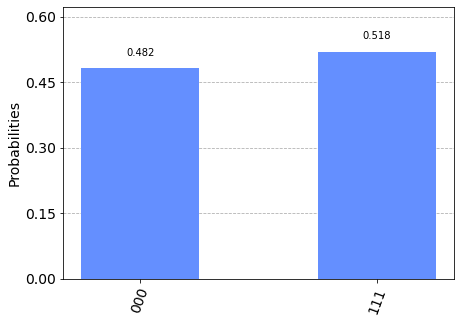

In [12]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

The estimated outcome probabilities $\mathrm{Pr}(000)$ and  $\mathrm{Pr}(111)$ are computed by taking the aggregate counts and dividing by the number of shots (times the circuit was repeated). Try changing the ``shots`` keyword in the ``run`` method and see how the estimated probabilities change.

**Now you are able to create, visualize and simulate quantum circuits with Qiskit!**

In [13]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright